# PPL

# Dataset Creation

<br>
<hr>

<h1 style="color:red"> Index</h1>
<br>

### 0. Setup

### 1. Read and Divide

### 2. Clean

### 3. Exploration

### 4. Visualization

### 5. Dataset Creation (shortcut for all of the above)

### 6. Import Data Created

<hr>
<br><br><br>


# 0. Setup

In [11]:
# set root folder (needed for imports)
import os
while not os.getcwd().endswith("ppl-model"):
    os.chdir("..")


# larger page width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# detect changes on folders
%load_ext autoreload
%autoreload 2


# my imports
import settings

from src.data_curation.clean import clean, get_stop_words
from src.data_curation.clean_model import clean_model
from src.data_curation import datasets_creation

# dskc
from dskc import dskc_clean
from dskc import dskc_exploration 
from dskc import dskc_graphs 


# third party imports
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Read and Divide

In [2]:
df = pd.read_csv(settings.DATASET_PROJECTS_PATH, index_col=None)
df = clean(df)
train, test = dskc_clean.divide_in_train_test(df, "FINANCED", shuffle=True)


Calculating countries... done
Calculating topics... saving model... done in 3s
Train is a dataframe of: 2022 rows and 74 columns
Test is a dataframe of: 506 rows and 74 columns


<br>

# 2. Clean

In [3]:
train = clean_model(train, normalize=False)

Calculating user projects... done
Merging rewards... done
Merging pledges... done
Filling days... done


In [18]:
train[train["financed"]==1].tail(100).iloc[20:25]

,title_prj_summary_topic_1,title_prj_summary_topic_2,title_prj_summary_topic_3,title_prj_summary_topic_4,title_prj_summary_topic_5,title_prj_summary_topic_6,title_length,channel,start_month,start_month_sin,start_month_cos,start_day,start_day_sin,start_day_cos,start_weekday,start_weekday_sin,start_weekday_cos,end_month,end_month_sin,end_month_cos,end_day,end_day_sin,end_day_cos,end_weekday,days,days_elapsed,percentage_days_elapsed,end_weekday_sin,end_weekday_cos,target,raised,percentage_raised,backers,amount_self_funded,percentage_target_self_funded,comments,images,views,facebook,uncond_channel,cat_agro-indústria,cat_alimentação/bebidas,cat_ambiente,cat_artes_plásticas,cat_cidadania_/_política,cat_ciência/tecnologia,cat_dança/cinema/teatro,cat_desporto,cat_educação,cat_empreendedorismo,cat_evento,cat_jogos,cat_livros/revistas,cat_moda/design,cat_música,cat_outros,cat_social,cat_turismo/viagens,cat_vídeo/fotografia,cat_zoófila,country_reduced_cabo_verde,country_reduced_mozambique,country_reduced_others,country_reduced_portugal,country_reduced_sao_tome_and_principe,user_n_projects,user_n_success_projects,n_rewards,reward_slot_1_amount,reward_slot_2_amount,reward_slot_3_amount,reward_slot_4_amount,reward_slot_5_amount,reward_slot_6_amount,financed
96224,0.060020,0.142326,0.135692,0.379929,0.176473,0.105559,49,1,11,-0.5,0.866025,18,-0.485302,-0.874347,0,0.000000,1.00000,12,-2.449294e-16,1.0,19,-6.513725e-01,-0.758758,3,31,28,0.903226,0.433884,-0.900969,3500,1910.0,0.545714,61,0.0,0.0,3.612903,5,1867.870968,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5,5,20,50,100,200,0,1
96225,0.060020,0.142326,0.135692,0.379929,0.176473,0.105559,49,1,11,-0.5,0.866025,18,-0.485302,-0.874347,0,0.000000,1.00000,12,-2.449294e-16,1.0,19,-6.513725e-01,-0.758758,3,31,29,0.935484,0.433884,-0.900969,3500,2042.0,0.583429,66,0.0,0.0,3.741935,5,1934.580645,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5,5,20,50,100,200,0,1
96226,0.060020,0.142326,0.135692,0.379929,0.176473,0.105559,49,1,11,-0.5,0.866025,18,-0.485302,-0.874347,0,0.000000,1.00000,12,-2.449294e-16,1.0,19,-6.513725e-01,-0.758758,3,31,30,0.967742,0.433884,-0.900969,3500,3500.0,1.000000,70,0.0,0.0,3.870968,5,2001.290323,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5,5,20,50,100,200,0,1
96543,0.073074,0.128535,0.251326,0.074013,0.388480,0.084571,66,0,11,-0.5,0.866025,26,-0.848644,0.528964,1,0.781831,0.62349,12,-2.449294e-16,1.0,31,-2.449294e-16,1.000000,1,35,0,0.000000,0.781831,0.623490,563,0.0,0.000000,0,0.0,0.0,0.000000,1,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6,1,2,5,7,12,15,1
96544,0.073074,0.128535,0.251326,0.074013,0.388480,0.084571,66,0,11,-0.5,0.866025,26,-0.848644,0.528964,1,0.781831,0.62349,12,-2.449294e-16,1.0,31,-2.449294e-16,1.000000,1,35,1,0.028571,0.781831,0.623490,563,138.0,0.245115,14,0.0,0.0,0.028571,1,62.485714,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6,1,2,5,7,12,15,1


In [21]:
train.describe()

,title_prj_summary_topic_1,title_prj_summary_topic_2,title_prj_summary_topic_3,title_prj_summary_topic_4,title_prj_summary_topic_5,title_prj_summary_topic_6,title_length,channel,start_month,start_month_sin,start_month_cos,start_day,start_day_sin,start_day_cos,start_weekday,start_weekday_sin,start_weekday_cos,end_month,end_month_sin,end_month_cos,end_day,end_day_sin,end_day_cos,end_weekday,days,days_elapsed,percentage_days_elapsed,end_weekday_sin,end_weekday_cos,target,raised,percentage_raised,backers,amount_self_funded,percentage_target_self_funded,comments,views,facebook,uncond_channel,cat_agro-indústria,cat_alimentação/bebidas,cat_ambiente,cat_artes_plásticas,cat_cidadania_/_política,cat_ciência/tecnologia,cat_dança/cinema/teatro,cat_desporto,cat_educação,cat_empreendedorismo,cat_evento,cat_jogos,cat_livros/revistas,cat_moda/design,cat_música,cat_outros,cat_social,cat_turismo/viagens,cat_vídeo/fotografia,cat_zoófila,country_reduced_cabo_verde,country_reduced_mozambique,country_reduced_others,country_reduced_portugal,country_reduced_sao_tome_and_principe,user_n_projects,user_n_success_projects,n_rewards,reward_slot_1_amount,reward_slot_2_amount,reward_slot_3_amount,reward_slot_4_amount,reward_slot_5_amount,reward_slot_6_amount,financed
count,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,9.682200e+04,9.682200e+04,96822.000000,9.682200e+04,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,9.682200e+04,9.682200e+04,96822.000000,9.682200e+04,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000,96822.000000
mean,0.155635,0.189817,0.146953,0.140026,0.179284,0.188263,35.959741,0.296110,6.373180,6.003379e-02,-5.655592e-03,15.529404,-1.672740e-03,-0.043589,2.115397,0.306289,0.057840,6.560255,3.468481e-02,-5.780248e-02,16.713071,8.195665e-03,0.010684,2.201401,60.775588,29.899300,0.489825,0.077794,-0.046737,3766.094607,926.067949,0.275955,33.508190,3.969521,0.002298,0.755596,2612.784234,0.826362,0.227614,0.008944,0.016701,0.023249,0.015678,0.014873,0.032565,0.082719,0.070108,0.079403,0.063188,0.040631,0.004699,0.131189,0.016628,0.128628,0.048884,0.135620,0.027081,0.031646,0.027566,0.008862,0.015203,0.177790,0.780525,0.017620,0.345686,0.252887,4.842463,6.411962,16.937421,33.656710,55.582843,119.158270,128.834573,0.452531
std,0.164566,0.162281,0.141228,0.136131,0.158732,0.157892,18.337504,0.456543,3.452188,7.072641e-01,7.043804e-01,8.682540,7.053232e-01,0.707550,1.719845,0.557584,0.769384,3.383143,6.809770e-01,7.292026e-01,9.158993,6.679851e-01,0.744060,1.775291,64.721214,41.303937,0.290337,0.529898,0.843197,12952.127030,8833.389094,0.402124,335.719338,68.607086,0.032543,2.528444,13409.288338,0.378800,0.419294,0.094151,0.128148,0.150694,0.124228,0.121044,0.177496,0.275458,0.255330,0.270369,0.243302,0.197435,0.068391,0.337609,0.127875,0.334789,0.215626,0.342386,0.162319,0.175056,0.163727,0.093719,0.122361,0.382338,0.413893,0.131566,2.515582,1.999667,1.299184,7.815197,24.255224,87.669431,149.158714,1258.907727,1195.526084,0.497744
min,0.000000,0.015118,0.015809,0.000000,0.012978,0.014506,3.000000,0.000000,1.000000,-1.000000e+00,-1.000000e+00,1.000000,-9.987165e-01,-0.994869,0.000000,-0.974928,-0.900969,1.000000,-1.000000e+00,-1.000000e+00,1.000000,-9.987165e-01,-0.994869,0.000000,4.000000,-41.000000,-0.953488,-0.974928,-0.900969,50.000000,0.000000,0.000000,0

<br>

# 3. Exploration

In [5]:
dskc_exploration.basic_exploration(train)




 _____     ______     ______   ______
/\  __-.  /\  __ \   /\__  _\ /\  __ \
\ \ \/\ \ \ \  __ \  \/_/\ \/ \ \  __ \
 \ \____-  \ \_\ \_\    \ \_\  \ \_\ \_\
  \/____/   \/_/\/_/     \/_/   \/_/\/_/

 ______     __  __     ______   __         ______     ______     ______     ______   __     ______     __   __
/\  ___\   /\_\_\_\   /\  == \ /\ \       /\  __ \   /\  == \   /\  __ \   /\__  _\ /\ \   /\  __ \   /\ "-.\ \
\ \  __\   \/_/\_\/_  \ \  _-/ \ \ \____  \ \ \/\ \  \ \  __<   \ \  __ \  \/_/\ \/ \ \ \  \ \ \/\ \  \ \ \-.  \
 \ \_____\   /\_\/\_\  \ \_\    \ \_____\  \ \_____\  \ \_\ \_\  \ \_\ \_\    \ \_\  \ \_\  \ \_____\  \ \_\\"\_\
  \/_____/   \/_/\/_/   \/_/     \/_____/   \/_____/   \/_/ /_/   \/_/\/_/     \/_/   \/_/   \/_____/   \/_/ \/_/




First 5 rows 

(transpose view)

                                                  0             1             2             3             4
-------------------------------------  ------------  ------------  ------------  -------

| Column                                | Type    |   Distinct values | Values                                                                        |   % Missing |
|---------------------------------------|---------|-------------------|-------------------------------------------------------------------------------|-------------|
| title_prj_summary_topic_1             | float64 |              1976 | [0.08289442956447601, '...']                                                  |           0 |
| title_prj_summary_topic_2             | float64 |              1979 | [0.11684910953044891, '...']                                                  |           0 |
| title_prj_summary_topic_3             | float64 |              1978 | [0.09118708968162537, '...']                                                  |           0 |
| title_prj_summary_topic_4             | float64 |              1977 | [0.08546164631843567, '...']                                                  |           0 |
| title_prj_summary_topic_5             | float64 |              1978 | [0.37906181812286377, '...']                                                  |           0 |
| title_prj_summary_topic_6             | float64 |              1978 | [0.2445458620786667, '...']                                                   |           0 |
| title_length                          | int64   |                93 | [36, 25, 37, 21, 10, 15, 62, 9, 28, 59, 64, 97, 48, 22, 38, '...']            |           0 |
| channel                               | int64   |                 2 | [0, 1]                                                                        |           0 |
| start_month                           | int64   |                12 | [8, 9, 11, 1, 12, 4, 2, 5, 10, 7, 6, 3]                                       |           0 |
| start_month_sin                       | float64 |                11 | [-0.8660254037844384, -1.0, '...']                                            |           0 |
| start_month_cos                       | float64 |                11 | [-0.5000000000000004, '...']                                                  |           0 |
| start_day                             | int64   |                31 | [16, 23, 15, 20, 21, 29, 25, 18, 10, 5, 3, 19, 22, 17, 14, 8, '...']          |           0 |
| start_day_sin                         | float64 |                31 | [-0.10116832198743204, '...']                                                 |           0 |
| start_day_cos                         | float64 |                26 | [-0.9948693233918952, '...']                                                  |           0 |
| start_weekday                         | int64   |                 7 | [1, 0, 2, 3, 4, 6, 5]                                                         |           0 |
| start_weekday_sin                     | float64 |                 7 | [0.7818314824680298, 0.0, '...']                                              |           0 |
| start_weekday_cos                     | float64 |                 7 | [0.6234898018587336, 1.0, '...']                                              |           0 |
| end_month                             | int64   |                12 | [10, 11, 12, 1, 3, 2, 6, 4, 8, 5, 7, 9]                                       |           0 |
| end_month_sin                         | float64 |                11 | [-0.8660254037844386, '...']                                                  |           0 |
| end_month_cos                         | float64 |                11 | [0.5000000000000001, '...']                                                   |           0 |
| end_day                               | int64   |                31 | [15, 14, 13, 19, 18, 20, 24, 25, 21, 8, 4, 27, 22, 1, 23, 10, '...']          |           0 |
| end_day_sin                           | float64 |                31 | [0.10116832198743272, '...']                                                  |           0 |
| end_day_cos                           | float64 |                26 | [-0.994869323391895, '...']                                                   |           0 |
| end_weekday                           | int64   |                 7 | [5, 0, 6, 4, 1, 3, 2]                                                         |           0 |
| days                                  | int64   |                97 | [60, 90, 89, 82, 96, 91, 59, 86, 40, 88, 58, 84, 36, 62, 44, '...']           |           0 |
| days_elapsed                          | int64   |               780 | [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, '...'] |           0 |
| percentage_days_elapsed               | float64 |              4410 | [0.0, 0.016666666666666666, '...']                                            |           0 |
| end_weekday_sin                       | float64 |                 7 | [-0.9749279121818236, 0.0, '...']                                             |           0 |
| end_weekday_cos                       | float64 |                 7 | [-0.2225209339563146, 1.0, '...']                                             |           0 |
| target                                | int64   |               289 | [3500, 2200, 800, 2500, 8000, 4000, 5000, '...']                              |           0 |
| raised                                | float64 |              5105 | [0.0, 120.0, 130.0, 160.0, 170.0, 190.0, '...']                               |           0 |
| percentage_raised                     | float64 |             14983 | [0.0, 0.03428571428571429, '...']                                             |           0 |
| backers                               | int64   |               660 | [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 17, 20, 22, 23, 26, 27, 28, '...']   |           0 |
| amount_self_funded                    | float64 |               166 | [0.0, 1010.0, 1515.0, 250.0, 80.0, 295.0, '...']                              |           0 |
| percentage_target_self_funded         | float64 |               394 | [0.0, 0.10631578947368421, 0.7575, '...']                                     |           0 |
| comments                              | float64 |              7539 | [0.0, 0.16666666666666666, '...']                                             |           0 |
| images                                | object  |                11 | ['5', '10', '2', '6', '8', '4', '3', '9', 0, '1', '7']                        |           0 |
| views                                 | float64 |             76639 | [0.0, 180.65, 361.3, 541.95, 722.6, '...']                                    |           0 |
| facebook                              | int64   |                 2 | [1, 0]                                                                        |           0 |
| uncond_channel                        | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_agro-indústria                    | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_alimentação/bebidas               | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_ambiente                          | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_artes_plásticas                   | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_cidadania_/_política              | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_ciência/tecnologia                | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_dança/cinema/teatro               | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_desporto                          | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_educação                          | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_empreendedorismo                  | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_evento                            | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_jogos                             | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_livros/revistas                   | int64   |                 2 | [1, 0]                                                                        |           0 |
| cat_moda/design                       | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_música                            | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_outros                            | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_social                            | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_turismo/viagens                   | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_vídeo/fotografia                  | int64   |                 2 | [0, 1]                                                                        |           0 |
| cat_zoófila                           | int64   |                 2 | [0, 1]                                                                        |           0 |
| country_reduced_cabo_verde            | int64   |                 2 | [0, 1]                                                                        |           0 |
| country_reduced_mozambique            | int64   |                 2 | [1, 0]                                                                        |           0 |
| country_reduced_others                | int64   |                 2 | [0, 1]                                                                        |           0 |
| country_reduced_portugal              | int64   |                 2 | [0, 1]                                                                        |           0 |
| country_reduced_sao_tome_and_principe | int64   |                 2 | [0, 1]                                                                        |           0 |
| user_n_projects                       | int64   |                38 | [0, 1, 2, 3, 10, 27, 36, 21, 24, 37, 30, 18, 25, 4, 14, 15, 31, '...']        |           0 |
| user_n_success_projects               | int64   |                31 | [0, 1, 2, 8, 21, 29, 3, 15, 18, 30, 24, 19, 11, 12, 25, 28, 23, 9, '...']     |           0 |
| n_rewards                             | int64   |                 7 | [6, 5, 4, 3, 2, 1, 0]                                                         |           0 |
| reward_slot_1_amount                  | int64   |                31 | [5, 10, 15, 25, 17, 1, 20, 12, 4, 2, 3, 7, 6, 30, 8, 50, 49, 13, 14, '...']   |           0 |
| reward_slot_2_amount                  | int64   |                38 | [10, 15, 35, 25, 20, 30, 45, 40, 6, 50, 5, 13, 12, 3, 8, 7, 24, '...']        |           0 |
| reward_slot_3_amount                  | int64   |                59 | [20, 30, 25, 50, 15, 40, 100, 60, 80, 35, 45, 75, 65, 90, '...']              |           0 |
| reward_slot_4_amount                  | int64   |                69 | [30, 50, 40, 100, 60, 250, 25, 35, 1000, 75, 0, 200, 65, '...']               |           0 |
| reward_slot_5_amount                  | int64   |                74 | [50, 100, 80, 60, 200, 165, 500, 1000, 2000, 30, 0, '...']                    |           0 |
| reward_slot_6_amount                  | int64   |                66 | [250, 0, 200, 350, 1500, 60, 140, 500, 175, 300, 75, '...']                   |           0 |
| financed                              | int64   |                 2 | [1, 0]                                                                        |           0 |






Pearson's Correlation


(graph)

Columns with values no higher than 0.05: 
- cat_jogos












<br>

# 4. Visualization

In [120]:
df = pd.read_csv(settings.DATASET_PROJECTS_PATH)
df = clean(df)
df = clean_model(df,normalize=False,mantain_id=True)

df["days_to_end"]=df["days"]-df["days_elapsed"]


Calculating topics... done in 20s
Calculating user projects... done
Merging rewards... Rewards calc topics... done in 41s
done
Merging pledges... done
Filling days... done


In [41]:
dskc_graphs.all_graphs(df, target="financed", gui=True)

Dropdown(description='Column:', options=('0. title_prj_summary_topic_1', '1. title_prj_summary_topic_2', '2. t…

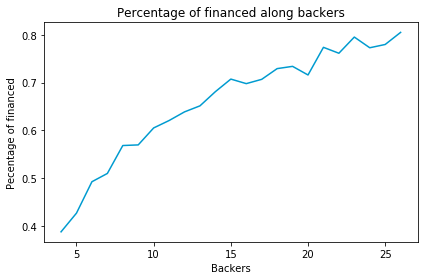

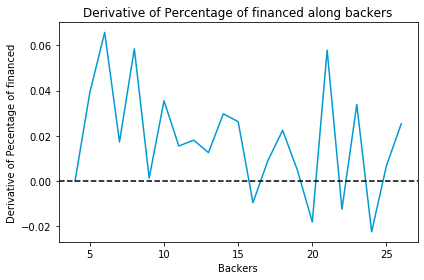

In [117]:
dskc_graphs.target_by_value(df, "backers", "financed","pid", no_outliers=True)

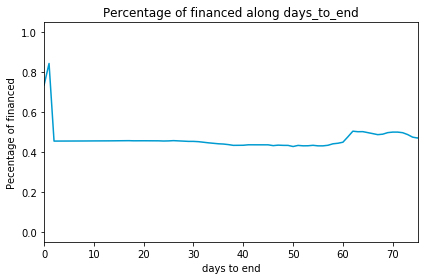

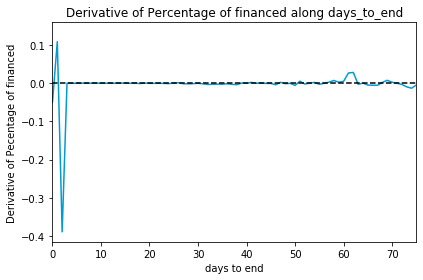

In [134]:
dskc_graphs.target_by_value(df, "days_to_end", "financed","pid",xrange=[0,75],xlabel="days to end")

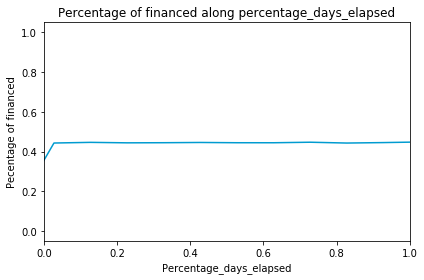

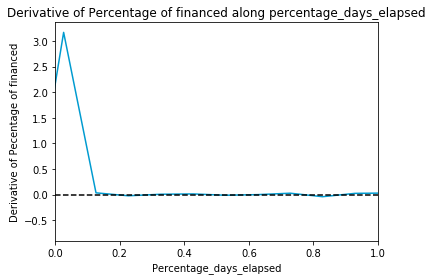

In [133]:
dskc_graphs.target_by_value(df, "percentage_days_elapsed", "financed","pid",xrange=[0,1],jump=0.1)

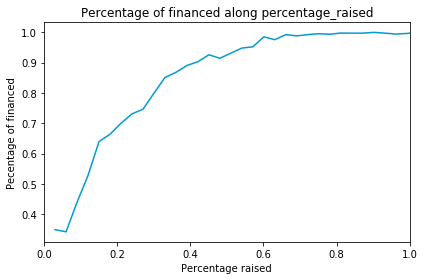

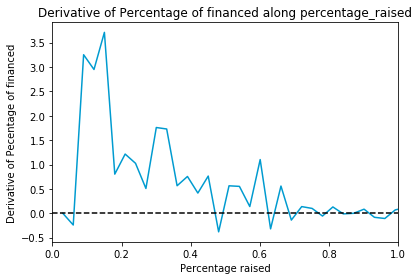

In [138]:
dskc_graphs.target_by_value(df, "percentage_raised", "financed","pid",xrange=[0,1],jump=0.03,xlabel="Percentage raised")

<br><br>
# 5. Datasets Creation (shortcut for all of the above)

In [ ]:
datasets_creation.create_train_test_dataset()

<br>

# 6. Import Data Created 

In [142]:
from src.modeling import util
from dskc import dskc_terminal

x_train, y_train, feature_names = util.read_train_data()

print("Train data: ")
print("X: {}".format(x_train.shape))
print("Y: {}".format(y_train.shape))

x_test, y_test, feature_names = util.read_test_data()

print("\nTest data: ")
print("X: {}".format(x_test.shape))
print("Y: {}".format(y_test.shape))



Train data: 
X: (97828, 113)
Y: (97828,)

Test data: 
X: (22859, 113)
Y: (22859,)
